### Object detection

In [42]:
!pip install ultralytics
!pip install opencv-python

In [43]:
# Import necessary libraries
import os
import cv2
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [44]:
# Define dataset path
dataset_path = '/kaggle/input/aquarium-dataset/aquarium_pretrain'  

# The data.yaml file should contain the dataset configuration with class names and paths
data_yaml = Path(dataset_path) / '/kaggle/input/aquarium-dataset/aquarium_pretrain/data.yaml'

# Checking if the data.yaml file exists
assert data_yaml.exists(), f'{data_yaml} does not exist.'

# Print dataset configuration
with open(data_yaml, 'r') as file:
    print(file.read())


train: ../train/images
val: ../valid/images

nc: 7
names: ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray']


In [45]:
from ultralytics import YOLO

# Load the pretrained YOLOv8 model
model = YOLO('yolov8n.pt')  


In [46]:
# Set training parameters
epochs = 10  # Define number of epochs for training
batch_size = 16  # Define batch size
img_size = 640  # Define image size (YOLO typically uses square images)

# Train the model on the custom dataset
model.train(
    data=str(data_yaml),  # Path to the data.yaml file
    epochs=epochs,         # Number of epochs
    batch=batch_size,      # Batch size (corrected argument)
    imgsz=img_size,        # Image size
    device=0,              # Set device to 0 for GPU or 'cpu' for CPU
    workers=4,             # Number of workers to load the data
    project='runs/train',  # Folder to save the results (e.g., 'runs/train')
    name='aquarium_yolov8',  # Name of the experiment                                                           
    exist_ok=True          # If experiment already exists, it will be overwritten
)

Ultralytics 8.3.91 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/aquarium-dataset/aquarium_pretrain/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=4, project=runs/train, name=aquarium_yolov8, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

/usr/local/lib/python3.10/dist-packages/ultralytics/utils/torch_utils.py:260: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/torch_utils.py:265: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

AMP: checks passed ✅


/usr/local/lib/python3.10/dist-packages/ultralytics/nn/modules/block.py:1307: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/modules/block.py:1309: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic becaus

train: WARNING ⚠️ Cache directory /kaggle/input/aquarium-dataset/aquarium_pretrain/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/input/aquarium-dataset/aquarium_pretrain/valid/labels... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<00:00, 352.28it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/aquarium-dataset/aquarium_pretrain/valid is not writeable, cache not saved.


Plotting labels to runs/train/aquarium_yolov8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/train/aquarium_yolov8
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/28 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:196: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
       1/10      3.59G      1.551      3.865      1.287        129        640: 100%|██████████| 28/28 [00:06<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      

                   all        127        909     0.0135      0.549     0.0635     0.0324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/28 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:196: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
       2/10       3.6G      1.606      2.722      1.294        114        640: 100%|██████████| 28/28 [00:05<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      

                   all        127        909      0.346     0.0758      0.221      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/28 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:196: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
       3/10       3.6G      1.553      2.358      1.261        110        640: 100%|██████████| 28/28 [00:05<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      

                   all        127        909      0.647      0.118      0.221      0.111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/28 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:196: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
       4/10       3.6G      1.528      2.191      1.239         90        640: 100%|██████████| 28/28 [00:05<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      

                   all        127        909      0.282      0.329      0.233      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/28 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:196: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
       5/10       3.6G      1.471      2.047      1.224        100        640: 100%|██████████| 28/28 [00:05<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      

                   all        127        909      0.485       0.44      0.399       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/28 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:196: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
       6/10       3.6G       1.49      1.949      1.226        138        640: 100%|██████████| 28/28 [00:05<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      

                   all        127        909       0.49      0.516       0.47      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/28 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:196: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
       7/10       3.6G      1.446      1.815      1.208        167        640: 100%|██████████| 28/28 [00:05<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      

                   all        127        909      0.584      0.604      0.573      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/28 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:196: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
       8/10       3.6G      1.407      1.741      1.183         87        640: 100%|██████████| 28/28 [00:05<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      

                   all        127        909      0.678       0.54      0.577      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/28 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:196: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
       9/10       3.6G      1.382      1.654      1.165        134        640: 100%|██████████| 28/28 [00:05<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      

                   all        127        909      0.675       0.59      0.606      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/28 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/utils/loss.py:196: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      10/10       3.6G      1.355      1.581      1.137        136        640: 100%|██████████| 28/28 [00:05<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      

                   all        127        909      0.711      0.579      0.623      0.356



10 epochs completed in 0.019 hours.
Optimizer stripped from runs/train/aquarium_yolov8/weights/last.pt, 6.2MB
Optimizer stripped from runs/train/aquarium_yolov8/weights/best.pt, 6.2MB

Validating runs/train/aquarium_yolov8/weights/best.pt...
Ultralytics 8.3.91 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


/usr/local/lib/python3.10/dist-packages/ultralytics/utils/torch_utils.py:260: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/torch_utils.py:265: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

                   all        127        909       0.71      0.579      0.623      0.355
                  fish         63        459      0.799      0.563      0.719      0.389
             jellyfish          9        155      0.737      0.877      0.857      0.486
               penguin         17        104       0.63      0.538        0.6      0.265
                puffin         15         74      0.538      0.378      0.355      0.159
                 shark         28         57      0.829       0.51       0.64      0.338
              starfish         17         27      0.839      0.519      0.532      0.385
              stingray         23         33      0.602      0.667      0.657      0.463


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 5.9ms postprocess per image
Results saved to runs/train/aquarium_yolov8


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a4befad0e20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  


image 1/1 /kaggle/input/aquarium-dataset/aquarium_pretrain/valid/images/IMG_2277_jpeg_jpg.rf.86c72d6192da48d941ffa957f4780665.jpg: 640x480 16 fishs, 7.9ms
Speed: 3.0ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


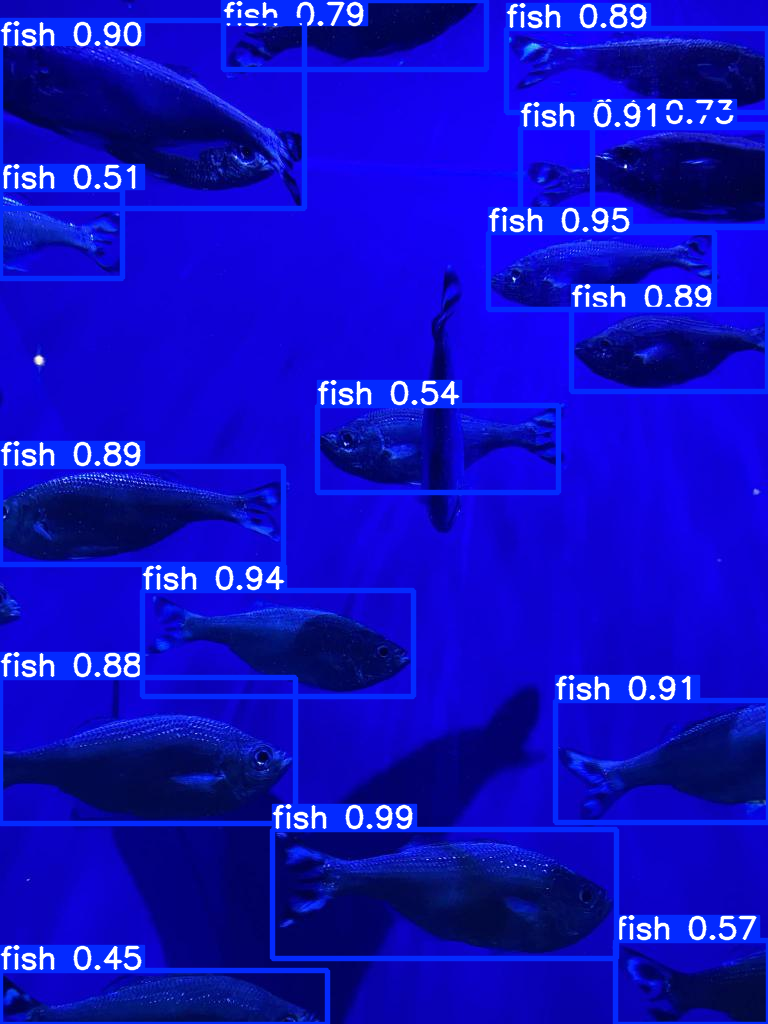

In [47]:
# Predict on a new image
img_path = "/kaggle/input/aquarium-dataset/aquarium_pretrain/valid/images/IMG_2277_jpeg_jpg.rf.86c72d6192da48d941ffa957f4780665.jpg"

# Make predictions on the new image
results = model.predict(source=img_path)


for result in results:
    # Show the predictions on the image
    result.show()  # This will display the image with predicted bounding boxes



image 1/1 /kaggle/input/aquarium-dataset/aquarium_pretrain/valid/images/IMG_2367_jpeg_jpg.rf.0f66a0ca8366d9c38e41eb2936629bdb.jpg: 640x480 1 fish, 1 starfish, 7.7ms
Speed: 2.6ms preprocess, 7.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


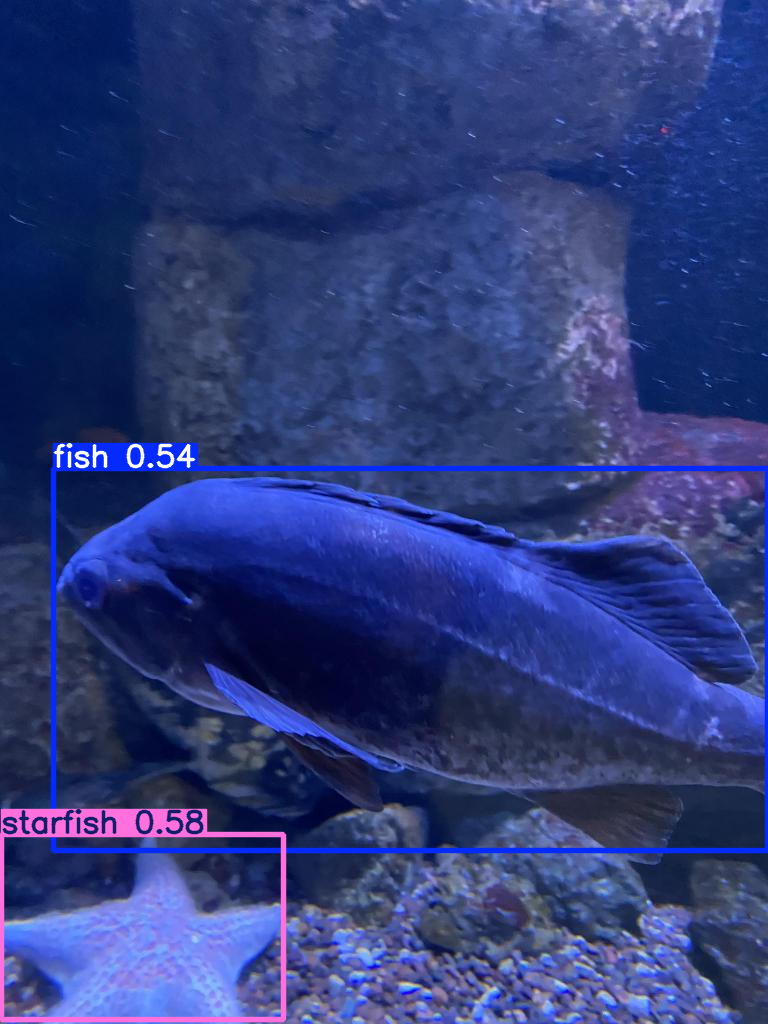

In [48]:
# Predict on a new image
img_path = "/kaggle/input/aquarium-dataset/aquarium_pretrain/valid/images/IMG_2367_jpeg_jpg.rf.0f66a0ca8366d9c38e41eb2936629bdb.jpg"

# Make predictions on the new image
results = model.predict(source=img_path)

for result in results:
    # Show the predictions on the image (bounding boxes, labels, etc.)
    result.show()  # This will display the image with predicted bounding boxes


In [62]:
# Extract metrics correctly
mAP50 = metrics.box.map50
mAP5095 = metrics.box.map

print(f"mAP@50: {mAP50:.3f}")
print(f"mAP@50-95: {mAP5095:.3f}")


mAP@50: 0.618
mAP@50-95: 0.353


### Improved model for object detection

In [13]:
!pip install ultralytics
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 46.1 MB/s eta 0:00:00


In [3]:
# Import necessary libraries
import os
import cv2
import torch
import yaml
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from ultralytics import YOLO

In [4]:
# Define dataset path
dataset_path = Path("/kaggle/input/aquarium-dataset/aquarium_pretrain")

# Define data.yaml path
data_yaml = dataset_path / "data.yaml"

# Check if data.yaml file exists
if not data_yaml.exists():
    raise FileNotFoundError(f"Error: {data_yaml} not found! Please check the dataset path.")

In [5]:
# Print dataset configuration
with open(data_yaml, "r") as file:
    dataset_config = yaml.safe_load(file)
    print("\nDataset Configuration:")
    print(yaml.dump(dataset_config, default_flow_style=False))


Dataset Configuration:
names:
- fish
- jellyfish
- penguin
- puffin
- shark
- starfish
- stingray
nc: 7
train: ../train/images
val: ../valid/images



In [6]:
# Load the pretrained YOLOv8 model
model = YOLO("yolov8n.pt")

In [7]:
# Set training parameters with optimizations
epochs = 10  
batch_size = 8  # Reduce batch size to prevent OOM errors
img_size = 512

In [8]:
# Enable mixed precision to reduce memory usage
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.backends.cudnn.benchmark = True  
torch.cuda.empty_cache()  # Clear unused memory

In [9]:
import torch

# Clear GPU memory before training
torch.cuda.empty_cache()

# Reduce batch size dynamically
batch_size = max(1, batch_size // 2)

# Enable mixed precision training (FP16)
use_amp = True  

# Move model to CPU before dataset loading
model.to("cpu")

# Train the model
model.train(
    data=str(data_yaml),
    epochs=epochs,
    batch=batch_size,
    amp=use_amp  # Enables automatic mixed precision
)

# Move model back to GPU for training
model.to("cuda")

# Enable memory-efficient training in PyTorch
torch.backends.cudnn.benchmark = True
torch.backends.cuda.matmul.allow_tf32 = True

# Free unnecessary cache
torch.cuda.empty_cache()


engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/aquarium-dataset/aquarium_pretrain/data.yaml, epochs=10, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=F

train: Scanning /kaggle/input/aquarium-dataset/aquarium_pretrain/train/labels... 448 images, 1 backgrounds, 0 corrupt: 100%|██████████| 448/448 [00:01<00:00, 390.46it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/aquarium-dataset/aquarium_pretrain/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/aquarium-dataset/aquarium_pretrain/valid/labels... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<00:00, 374.44it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/aquarium-dataset/aquarium_pretrain/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.559      3.738      1.302         17        640: 100%|██████████| 112/112 [02:12<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.18it/s]

                   all        127        909      0.179      0.223      0.165     0.0925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.555      2.907      1.308         28        640: 100%|██████████| 112/112 [02:10<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.18it/s]

                   all        127        909      0.301      0.274      0.226      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.592      2.601      1.326         32        640: 100%|██████████| 112/112 [02:08<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:15<00:00,  1.02it/s]

                   all        127        909      0.326      0.366       0.29      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.546      2.536      1.299         40        640: 100%|██████████| 112/112 [02:05<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.21it/s]

                   all        127        909      0.361       0.37      0.366      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.524      2.412      1.274         20        640: 100%|██████████| 112/112 [02:05<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.18it/s]

                   all        127        909      0.398      0.452      0.401      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.483      2.228      1.258         59        640: 100%|██████████| 112/112 [02:07<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.23it/s]

                   all        127        909       0.49       0.47       0.46      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.469      2.124      1.246         50        640: 100%|██████████| 112/112 [02:07<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.21it/s]

                   all        127        909      0.561      0.432      0.495      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.429      2.048      1.233         34        640: 100%|██████████| 112/112 [02:08<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.18it/s]

                   all        127        909      0.587      0.494      0.545      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.401      1.974      1.231         26        640: 100%|██████████| 112/112 [02:08<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.25it/s]

                   all        127        909      0.656       0.49      0.558       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.386      1.906      1.202         25        640: 100%|██████████| 112/112 [02:05<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.19it/s]

                   all        127        909      0.643      0.566      0.614       0.36



10 epochs completed in 0.395 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.92 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.15it/s]


                   all        127        909      0.643      0.566      0.614       0.36
                  fish         63        459      0.627      0.611      0.641      0.343
             jellyfish          9        155      0.803      0.763      0.867      0.486
               penguin         17        104       0.55      0.654      0.627      0.252
                puffin         15         74      0.557      0.257      0.307      0.155
                 shark         28         57       0.51      0.509      0.543      0.296
              starfish         17         27      0.828      0.535      0.621      0.494
              stingray         23         33      0.627      0.636       0.69      0.496


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 2.9ms preprocess, 81.7ms inference, 0.0ms loss, 11.6ms postprocess per image
Results saved to runs/detect/train3


In [10]:
# Path to test image
img_path = dataset_path / "valid/images/IMG_2277_jpeg_jpg.rf.86c72d6192da48d941ffa957f4780665.jpg"

# Ensure test image exists
if not img_path.exists():
    raise FileNotFoundError(f"Error: Test image {img_path} not found!")

# Make predictions
results = model.predict(source=str(img_path), save=True, show=True, conf=0.25)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /kaggle/input/aquarium-dataset/aquarium_pretrain/valid/images/IMG_2277_jpeg_jpg.rf.86c72d6192da48d941ffa957f4780665.jpg: 640x480 11 fishs, 2 sharks, 527.8ms
Speed: 5.0ms preprocess, 527.8ms inference, 65.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/train32


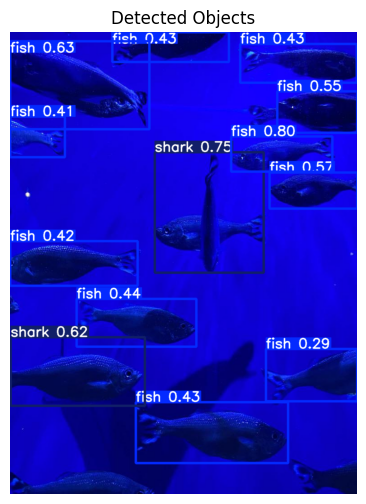

val: Scanning /kaggle/input/aquarium-dataset/aquarium_pretrain/valid/labels... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<00:00, 418.88it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/aquarium-dataset/aquarium_pretrain/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.13it/s]


                   all        127        909      0.646      0.566      0.615       0.36
                  fish         63        459      0.628      0.612      0.642      0.344
             jellyfish          9        155      0.812      0.761      0.868      0.488
               penguin         17        104      0.552      0.654      0.629      0.252
                puffin         15         74      0.561      0.257      0.311      0.155
                 shark         28         57      0.511      0.509      0.544      0.297
              starfish         17         27      0.828      0.534       0.62      0.491
              stingray         23         33      0.628      0.636      0.691      0.496


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 25.1ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train33

 Model Evaluation Metrics:
mAP@50: 0.615
mAP@50-95: 0.360


In [11]:
# Display results
for result in results:
    img_with_boxes = result.plot()  # Get image with bounding boxes
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Detected Objects")
    plt.show()

# Evaluate model performance on validation set
metrics = model.val()
print(f"\n Model Evaluation Metrics:")
print(f"mAP@50: {metrics.box.map50:.3f}")
print(f"mAP@50-95: {metrics.box.map:.3f}")